# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [33]:
#Type your code here
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import joblib
from sklearn.pipeline import Pipeline

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [34]:
df= pd.read_csv("insurance_raw.csv")

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [36]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [37]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [38]:
df.duplicated().sum()

np.int64(1)

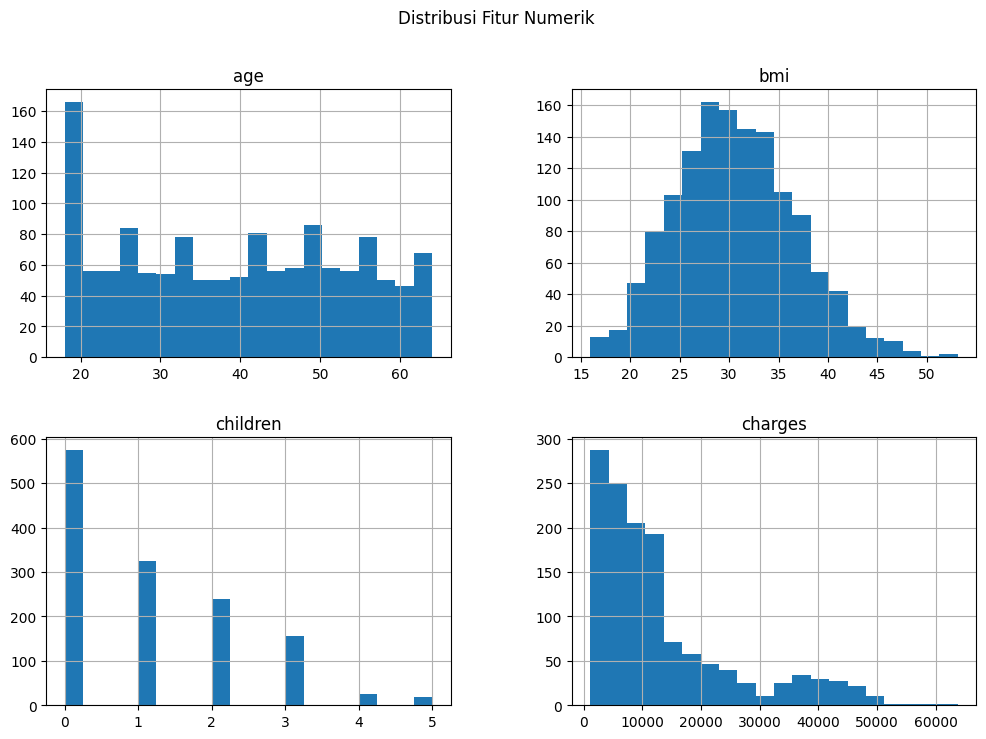

In [39]:
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols].hist(figsize=(12, 8), bins=20)
plt.suptitle("Distribusi Fitur Numerik")
plt.show()

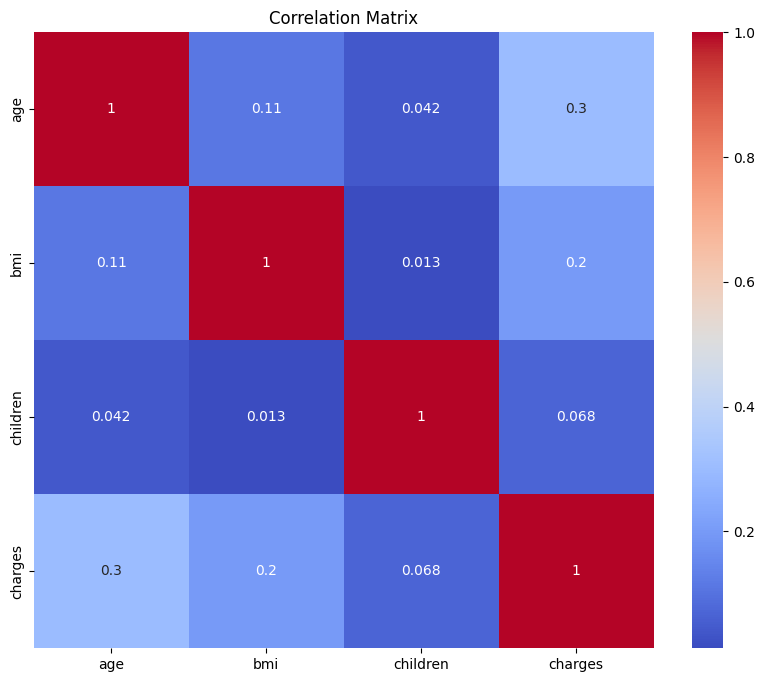

In [40]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [41]:
df = df.drop_duplicates()

In [42]:
Q1 = df["bmi"].quantile(0.25)
Q3 = df["bmi"].quantile(0.75)
IQR = Q3 - Q1

df = df[(df["bmi"] >= Q1 - 1.5*IQR) & (df["bmi"] <= Q3 + 1.5*IQR)]

In [43]:
df_encoded = pd.get_dummies(
    df,
    columns=["sex", "smoker", "region"],
    drop_first=True
)

In [44]:
scaler = StandardScaler()
df_encoded[["age", "bmi", "children"]] = scaler.fit_transform(
    df_encoded[["age", "bmi", "children"]]
)

In [45]:
X = df.drop("charges", axis=1)
y = df["charges"]

num_cols = ["age", "bmi", "children"]
cat_cols = ["sex", "smoker", "region"]

preprocess = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(), cat_cols)
])

X_processed = preprocess.fit_transform(X)

In [46]:
df_encoded["age_group"] = pd.cut(
    df["age"],
    bins=[18, 30, 45, 60, 100],
    labels=["young", "adult", "mid_age", "senior"]
)

In [47]:
feature_names = (
    num_cols +
    list(preprocess.named_transformers_["cat"]
         .get_feature_names_out(cat_cols))
)

X_processed_df = pd.DataFrame(
    X_processed.toarray() if hasattr(X_processed, "toarray") else X_processed,
    columns=feature_names
)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X_processed_df,
    y,
    test_size=0.2,
    random_state=42
)

In [49]:
os.makedirs("insurance_preprocessing", exist_ok=True)

X_train.to_csv("insurance_preprocessing/X_train.csv", index=False)
X_test.to_csv("insurance_preprocessing/X_test.csv", index=False)
y_train.to_csv("insurance_preprocessing/y_train.csv", index=False)
y_test.to_csv("insurance_preprocessing/y_test.csv", index=False)

print("Hasil preprocessing berhasil disimpan ke CSV")

Hasil preprocessing berhasil disimpan ke CSV
